性比の遺伝あり

In [2]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics
random.seed(0)
np.random.seed(0)

In [3]:
# 個体クラスの定義
class Agent():
    def __init__(self, x, life_length, cool_time, accident_rate=0, born_rate=1):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.sexratio = x
        self.life_length = life_length
        self.age = 0
        self.cool_time = cool_time                        # 性成熟する年齢
        self.death_rate = (1/life_length) + accident_rate # 年間の死亡割合
        self.born_rate = born_rate                        # 流産しない割合

    # 歳を取る
    def aging(self):
        self.age += 1

    # 死亡判定処理
    def judge_death(self):
        if self.age == self.life_length:
            return True
        else:
            return np.random.choice([True, False], p=[self.death_rate, (1-self.death_rate)])

In [4]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, firstsize, Nmax, x, life_length, cool_time, accident_rate=0, born_rate=1):
        self.population = self.__initialize(firstsize, x, life_length, cool_time, accident_rate, born_rate)
        self.Nmax = Nmax
        self.life_length = life_length
        self.cool_time = cool_time
        self.accident_rate = accident_rate
        self.born_rate = born_rate


    # 初期集団をつくる
    def __initialize(self, firstsize, x, life_length, cool_time, accident_rate, born_rate):
        population = []

        for i in range(firstsize):
            population.append(Agent(x, life_length, cool_time, accident_rate, born_rate))
        
        return population


    # 次世代の性比強度の決定
    def __make_nextGen(self, female, male):
        ave = 0
        nextgen = 0
    
        # 両親の性比強度の平均
        ave = (female.sexratio + male.sexratio) / 2
        # 平均ave、分散0.1の正規分布から次世代の値を決定
        while nextgen <= 0 or nextgen >= 1:
            nextgen = np.random.normal(ave, 0.1)
    
        return nextgen


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        chosen_female = []
        newgen = []

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > focal.cool_time):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > focal.cool_time) :
                female_population.append(focal)

        # 流産しない個体を選抜
        for forcal in female_population:
            if np.random.rand() <= focal.born_rate:
                chosen_female.append(forcal)
        
        # 交尾させる雌雄の抽出と交配
        for _ in range(len(chosen_female)):
            cop_female = chosen_female.pop(random.randrange(len(chosen_female)))
            cop_male = random.choice(male_population)
            newgen.append(self.__make_nextGen(cop_female, cop_male))
        
        return newgen


    # 個体数抑制(短い世代を考えるのでほぼ機能しない)
    def __population_control(self):
        while len(self.population) > int(self.Nmax):
            index = random.randrange(len(self.population))
            del self.population[index]

    
    # 1世代のシミュレーションを実行
    def run_one_episode(self):
            
        newegg = self.__copulation()
        for i in newegg:
            self.population.append(Agent(
                i, 
                self.life_length, 
                self.cool_time, 
                self.accident_rate, 
                self.born_rate
            ))

        for focal in self.population:
            focal.aging()
            if focal.judge_death():
                index = self.population.index(focal)
                del self.population[index]

        self.__population_control()

In [5]:
# main処理
def main(iteration, firstsize, Nmax, x, life_length, cool_time, accident_rate=0, born_rate=1):
    t = list(range(1, (iteration + 1)))
    population_size = []
    sexratio = []
    simulation = Simulation(firstsize, Nmax, x, life_length, cool_time, accident_rate, born_rate)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1
        population_size.append(len(simulation.population))
        sexratio.append(male_size / len(simulation.population))

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, population_size)
    plt.title('population size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 50/50 [00:00<00:00, 72.19it/s] 


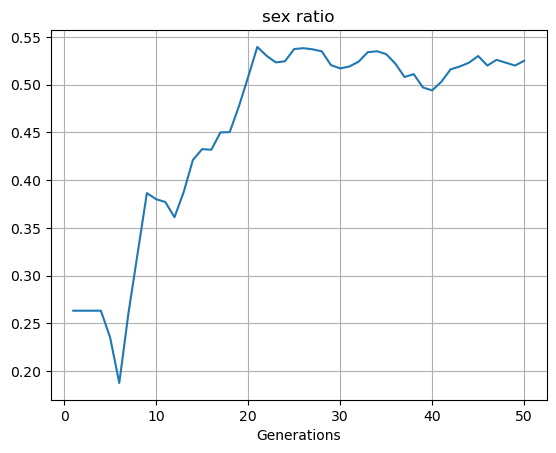

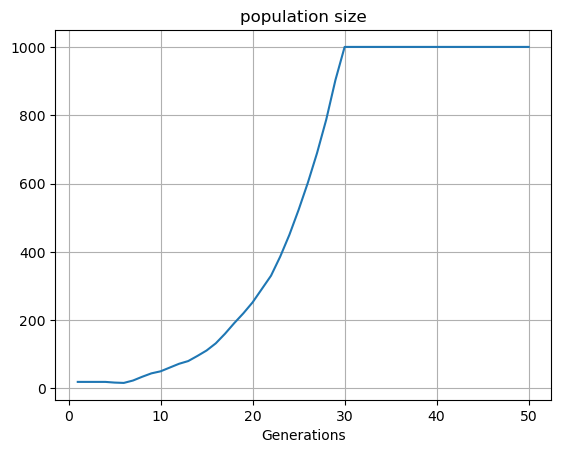

In [6]:
# 世代数：50, 初期個体数：20, 個体数上限：1000, 性比：1:1, 寿命：30年クールタイム：5年, accident_rate=0, born_rate=1
main(50, 20, 1000, 0.5, 30, 5)

100%|██████████| 50/50 [00:00<00:00, 868.55it/s]


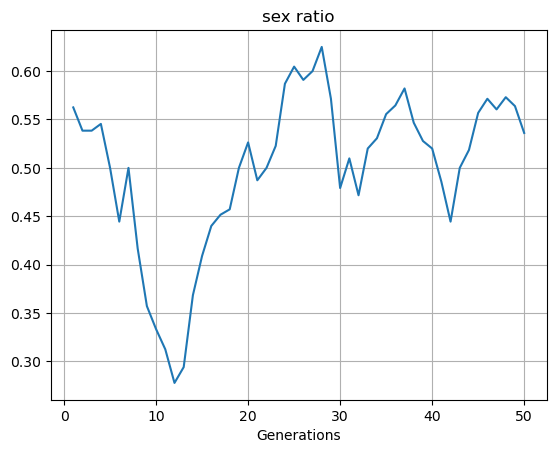

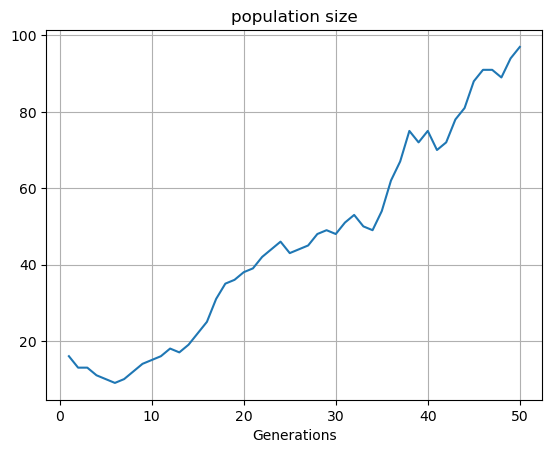

In [7]:
# 世代数：50, 初期個体数：20, 個体数上限：1000, 性比：1:1, 寿命：30年クールタイム：5年, 
# accident_rate=1/15, born_rate=0.9
main(50, 20, 1000, 0.5, 30, 5, 1/10, 0.9)

In [8]:
a_list = []
for i in range(100000):
    a_list.append(np.random.rand())

print((sum([i <= 0.7 for i in a_list])) / len(a_list))

0.69748


初期集団の性比のみ(x, 1-x)、あとは(0.5, 0.5)  
初期集団の年齢は0～29からランダムに決定  
agentは寿命と一定の死亡率で死亡  
流産しない確率を設定  

初期性比：ランダムに性別を決定するから、確実にその値とはかぎらない

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [2]:
# 個体クラスの定義
class Agent():
    def __init__(self, life_length, x=0.5, accident_rate=0):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.life_length = life_length
        self.age = 0
        self.death_rate = (1/life_length) + accident_rate # 年間の死亡割合


    # 歳を取る
    def aging(self):
        self.age += 1


    # 死亡判定処理
    def judge_death(self):
        # 寿命で死亡
        if self.age == self.life_length:
            return True
        # 一定の死亡率で死亡
        else:
            return np.random.choice([True, False], p=[self.death_rate, (1-self.death_rate)])

In [3]:
# シミュレーションクラスの定義

# firstsize:初期個体数、Nmax:個体数上限、life_length:寿命、cool_time:性成熟する年齢
# x:初期集団の性比、accident_rate:年間の事故での死亡割合、born_rate:流産しない割合

class Simulation():
    def __init__(self, firstsize, Nmax, life_length, cool_time, x=0.5, accident_rate=0, born_rate=1):
        self.random_seed = (accident_rate * 1000) # ランダムシード固定用
        self.population = self.__initialize(firstsize, life_length, x, accident_rate)
        self.Nmax = Nmax
        self.life_length = life_length
        self.cool_time = cool_time
        self.accident_rate = accident_rate
        self.born_rate = born_rate


    # 初期集団をつくる
    def __initialize(self, firstsize, life_length, x, accident_rate):
        population = []
        np.random.seed(self.random_seed)

        # firstsizeとxに従って初期集団をつくる
        # 初期集団の個体の年齢はランダムに決定
        for i in range(firstsize):
            focal = Agent(life_length, x, accident_rate)
            focal.age = np.random.randint(30)
            population.append(focal)
        
        return population


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        chosen_female = []
        newgen = []
        np.random.seed(self.random_seed)

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > self.cool_time):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > self.cool_time) :
                female_population.append(focal)

        # 流産しない個体を確率で選抜
        for focal in female_population:
            if np.random.rand() <= self.born_rate:
                chosen_female.append(focal)
        
        # メスが子供を産む
        for _ in chosen_female:
            self.population.append(Agent(
                self.life_length,
                accident_rate=self.accident_rate
            ))


    # 個体数抑制(短い世代を考えるのでほぼ機能しない？)
    def __population_control(self):
        np.random.seed(self.random_seed)
        while len(self.population) > int(self.Nmax):
            index = random.randrange(len(self.population))
            del self.population[index]
    
    # 1世代のシミュレーションを実行
    def run_one_episode(self):
        np.random.seed(self.random_seed)

        self.__copulation()

        for focal in self.population:
            focal.aging()
            if focal.judge_death():
                index = self.population.index(focal)
                del self.population[index]

        self.__population_control()

In [4]:
# main処理
def main(iteration, firstsize, Nmax, life_length, cool_time, x=0.5, accident_rate=0, born_rate=1):
    t = list(range(1, (iteration + 1)))
    population_size = []
    sexratio = []
    simulation = Simulation(firstsize, Nmax, life_length, cool_time, x, accident_rate, born_rate)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1

        population_size.append(len(simulation.population))
        if len(simulation.population) != 0:
            sexratio.append(male_size / len(simulation.population))
        else:
            sexratio.append(0)

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, population_size)
    plt.title('population size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 50/50 [00:00<00:00, 69.81it/s] 


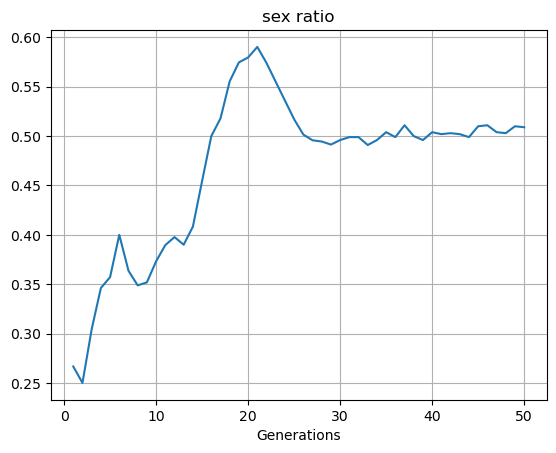

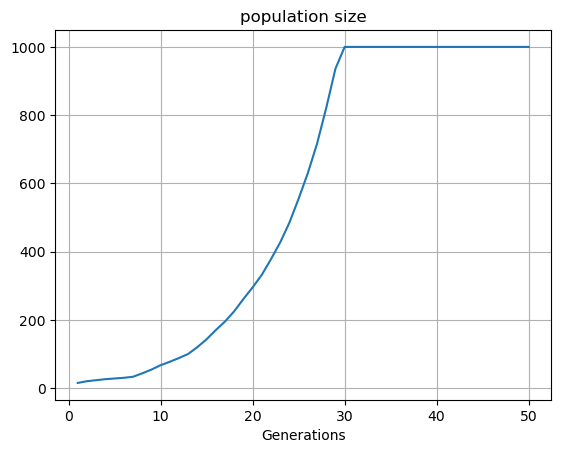

In [8]:
# main(iteration, firstsize, Nmax, life_length, cool_time, x, accident_rate=0, born_rate=1)
# 世代数:50、初期個体数:10、個体数上限:1000、寿命:30、性成熟の年齢:5
# 初期集団の性比:0.5、accident_rate:0, born_rate:1
main(50, 10, 1000, 30, 5)

100%|██████████| 100/100 [00:00<00:00, 2723.24it/s]


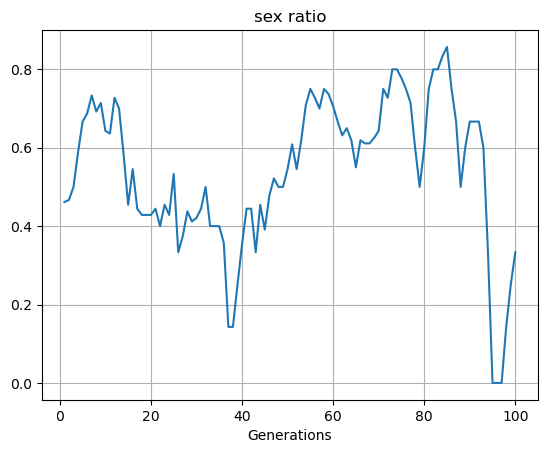

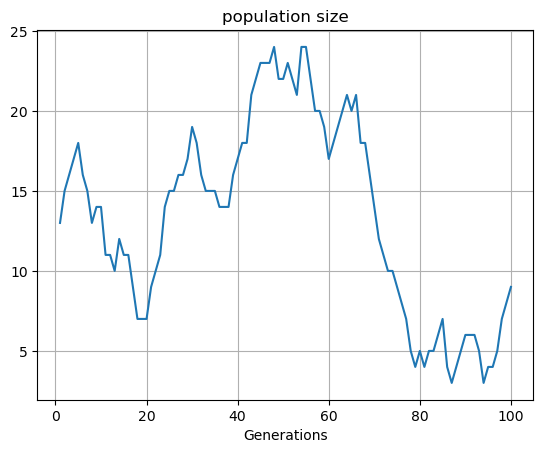

In [14]:
# 世代数:50、初期個体数:10、個体数上限:1000、寿命:30、性成熟の年齢:5
# 初期集団の性比:0.5、accident_rate:1/10, born_rate:0.7
main(100, 10, 1000, 30, 5, accident_rate=1/10, born_rate=0.7)

確率を廃止して割合にする

In [15]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [16]:
# 個体クラスの定義
class Agent():
    def __init__(self, life_length):
        self.sex = np.random.choice(['m', 'f'])
        self.life_length = life_length
        self.age = 0


    # 歳を取る
    def aging(self):
        self.age += 1


    # 死亡判定処理
    def judge_death(self):
        # 寿命で死亡
        if self.age >= self.life_length:
            return True

In [17]:
# シミュレーションクラスの定義

# firstsize:初期個体数、Nmax:個体数上限、life_length:寿命、cool_time:性成熟する年齢
# x:初期集団のオスの比率、accident_rate:年間の事故での死亡割合、born_rate:流産しない割合

class Simulation():
    def __init__(self, firstsize, Nmax, life_length, cool_time, x=0.5, accident_rate=0, born_rate=1):
        self.population = self.__initialize(firstsize, life_length, x)
        self.Nmax = Nmax
        self.life_length = life_length
        self.cool_time = cool_time
        self.death_rate = (1/life_length) + accident_rate # 年間の死亡割合
        self.born_rate = born_rate


    # 初期集団をつくる
    def __initialize(self, firstsize, life_length, x):
        population = []

        # firstsizeとxに従って初期集団をつくる
        # 初期集団の個体の年齢はランダムに決定
        for i in range(int(firstsize * x)):
            focal = Agent(life_length)
            focal.sex = 'm'
            focal.age = random.randrange(30)
            population.append(focal)

        for i in range(int(firstsize * (1-x))):
            focal = Agent(life_length)
            focal.sex = 'f'
            focal.age = random.randrange(30)
            population.append(focal)

        random.shuffle(population)
        
        return population


    # 集団内の交尾
    def __copulation(self):
        mature_female_population = []

        # 生殖可能なメス個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'f') and (focal.age > self.cool_time) :
                mature_female_population.append(focal)

        # 生まれる個体数の計算
        n_child = int(len(mature_female_population) * self.born_rate)

        # 出産
        for _ in range(n_child):
            child = Agent(self.life_length)
            self.population.append(child)

        random.shuffle(self.population)


    # 一定の死亡率で死亡
    def __death(self):
        # 死亡数の計算
        n_death = int(len(self.population) * self.death_rate)

        # 死亡
        for _ in range(n_death):
            index = random.randrange(len(self.population))
            del self.population[index]


    # 個体数抑制
    def __population_control(self):
        while len(self.population) > int(self.Nmax):
            index = random.randrange(len(self.population))
            del self.population[index]

    
    # 1世代のシミュレーションを実行
    def run_one_episode(self):
            
        self.__copulation()

        for focal in self.population:
            focal.aging()
            if focal.judge_death():
                index = self.population.index(focal)
                del self.population[index]
        
        self.__death()

        self.__population_control()

In [18]:
# main処理
def main(iteration, firstsize, Nmax, life_length, cool_time, x=0.5, accident_rate=0, born_rate=1):
    t = list(range(0, (iteration + 1)))
    population_size = [firstsize]
    sexratio = [x]
    simulation = Simulation(firstsize, Nmax, life_length, cool_time, x, accident_rate, born_rate)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1

        population_size.append(len(simulation.population))
        if len(simulation.population) != 0:
            sexratio.append(male_size / len(simulation.population))
        else:
            sexratio.append(0)

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, population_size)
    plt.title('population size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 50/50 [00:00<00:00, 464.11it/s]


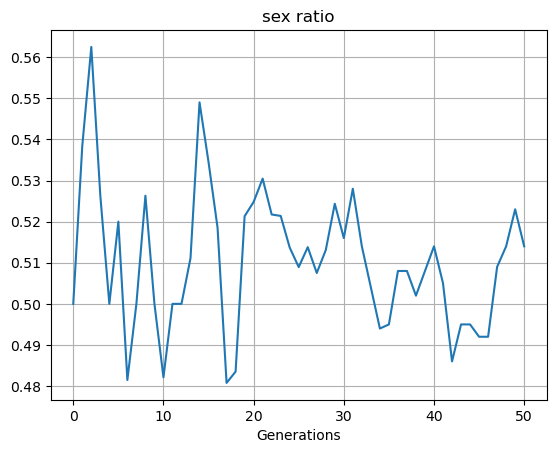

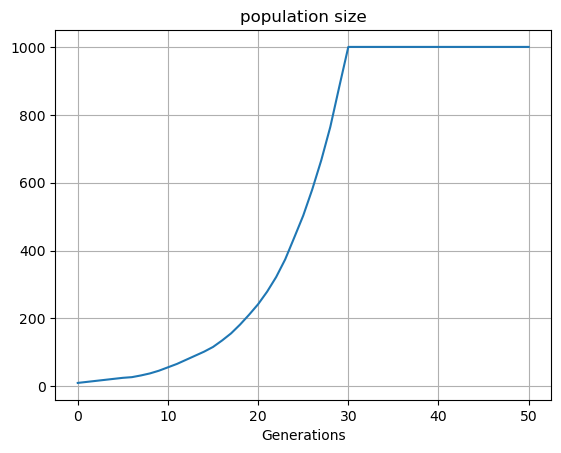

In [19]:
# main(iteration, firstsize, Nmax, life_length, cool_time, x, accident_rate=0, born_rate=1)
# 世代数:50、初期個体数:10、個体数上限:1000、寿命:30、性成熟の年齢:5
# 初期集団の性比:0.5、accident_rate:0, born_rate:1
main(50, 10, 1000, 30, 5)

100%|██████████| 50/50 [00:00<00:00, 10365.01it/s]


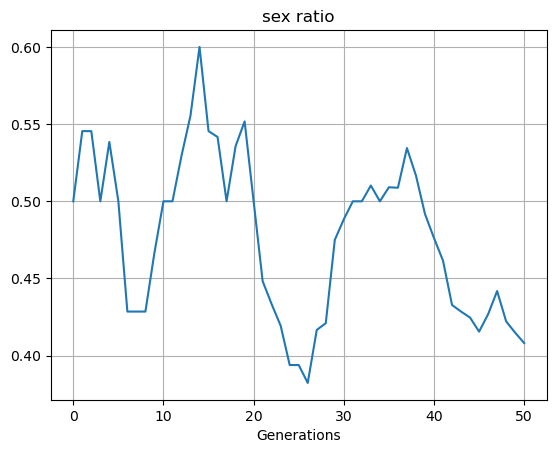

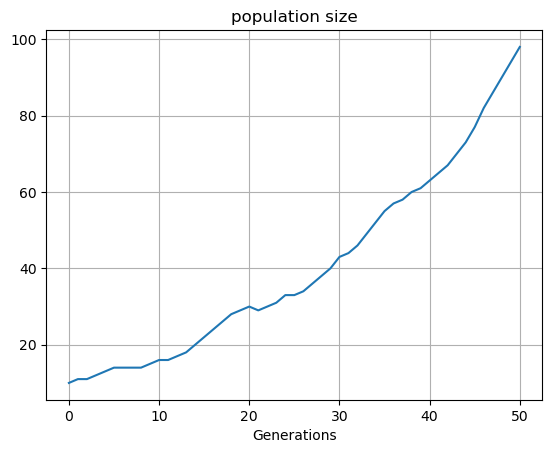

In [27]:
# 世代数:50、初期個体数:10、個体数上限:1000、寿命:30、性成熟の年齢:5
# 初期集団の性比:0.5、accident_rate:1/10, born_rate:0.7
main(50, 10, 1000, 30, 5, accident_rate=0, born_rate=0.25)